In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Machine Learning\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<Axes: xlabel='Age', ylabel='Income($)'>

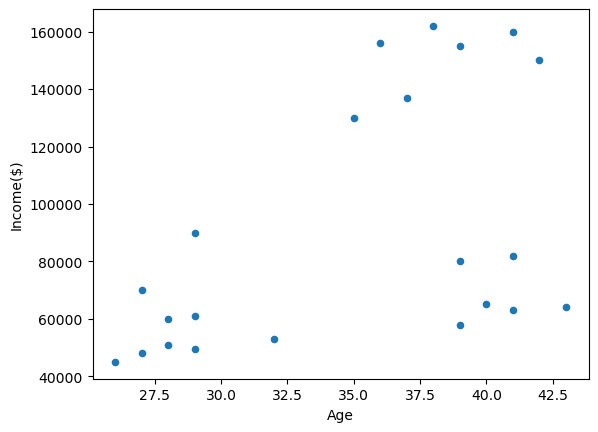

In [3]:
df.plot.scatter(x = "Age", y = "Income($)")

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters= 3)
km

KMeans(n_clusters=3)

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, _, _ = train_test_split(df.drop(columns= 'Name'), df.drop(columns= 'Name'), test_size= 0.2)

In [11]:
km.fit(x_train)

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
y_predicted = km.fit_predict(df.drop(columns= 'Name'))
y_predicted

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [20]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

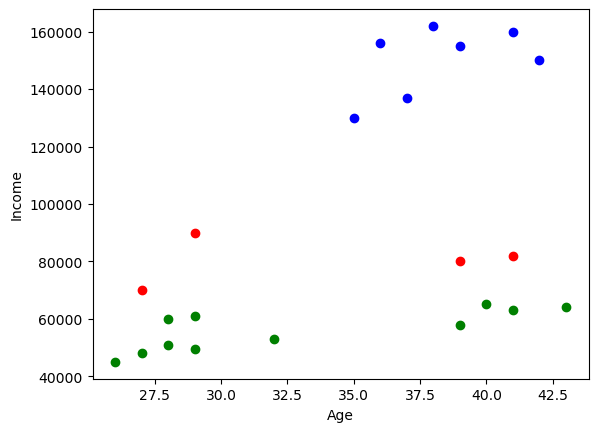

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = "green")
plt.scatter(df2['Age'], df2['Income($)'], color = "blue")
plt.scatter(df3['Age'],df3['Income($)'], color = "red")

plt.xlabel('Age')
plt.ylabel('Income')

#### we need to scale this to get more of a clear clusters in these outlierrs

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


## SCALING: 

#### the range of x is quite small compared to range of y therefore scaling is used to increased the range this also helps in taking out outliers and in clusteriing, helping in making more accurate clusters

In [33]:
scaler.fit(df[['Income($)']])


MinMaxScaler()

In [42]:
df['Income($)'] = scaler.transform(np.array(df['Income($)']).reshape(-1,1))

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [44]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(np.array(df['Age']).reshape(-1,1))

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [46]:
km = KMeans(n_clusters= 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [48]:
df['cluster']  = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Text(0, 0.5, 'Income')

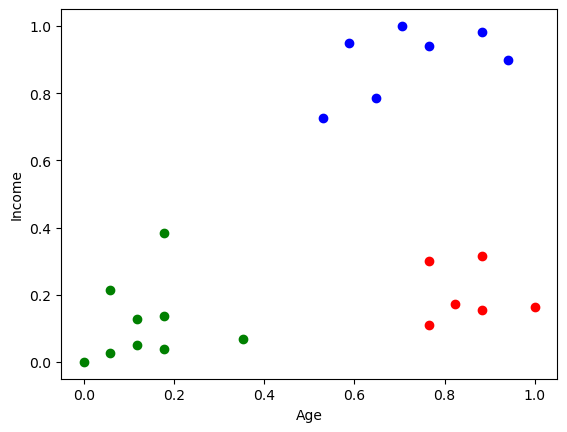

In [49]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = "green")
plt.scatter(df2['Age'], df2['Income($)'], color = "blue")
plt.scatter(df3['Age'],df3['Income($)'], color = "red")

plt.xlabel('Age')
plt.ylabel('Income')

In [50]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])